In [ ]:
 %pip install numpy pandas matplotlib


In [8]:
import numpy as np
import matplotlib.pyplot  as plt

In [9]:
# we need synthetic data

n = 100
rng = np.random.default_rng()
X = 2*rng.random((n,1)) # input features
y = 4 + 3*X + rng.normal(0,1,(n,1)) # target

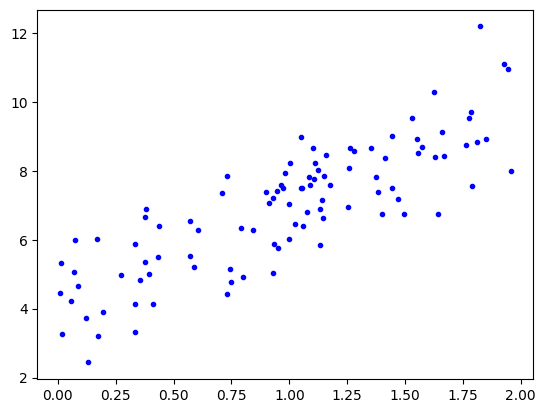

In [10]:
plt.figure()
plt.plot(X,y,"b.")
plt.show()

In [11]:
X_b = np.hstack([X, np.ones((n,1))]) # design matrix -> first example of feature engineering
X_b 

array([[0.99814602, 1.        ],
       [0.00859072, 1.        ],
       [1.63026678, 1.        ],
       [1.05077476, 1.        ],
       [1.05358362, 1.        ],
       [1.47106633, 1.        ],
       [0.37536329, 1.        ],
       [1.57399305, 1.        ],
       [1.10096801, 1.        ],
       [0.17457355, 1.        ],
       [1.64232023, 1.        ],
       [1.44398277, 1.        ],
       [1.25383573, 1.        ],
       [1.94549496, 1.        ],
       [1.05191497, 1.        ],
       [0.70846871, 1.        ],
       [0.97377753, 1.        ],
       [0.89968127, 1.        ],
       [0.07184961, 1.        ],
       [1.13082487, 1.        ],
       [1.08725891, 1.        ],
       [1.38481069, 1.        ],
       [0.94838189, 1.        ],
       [1.05846006, 1.        ],
       [1.14743213, 1.        ],
       [0.01286128, 1.        ],
       [0.16823592, 1.        ],
       [0.0693514 , 1.        ],
       [0.4124447 , 1.        ],
       [1.25970672, 1.        ],
       [0.

In [12]:

w_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
w_best

array([[2.87507554],
       [4.12391064]])

In [ ]:
X_new = np.array([[0,1], [2,1]])
#use model equation

y_pred = X_new @ w_best
plt.figure()
plt.plot()

Batch Gradient Descent
Loss Function
Gradient Descent Update Rule

In [ ]:
alpha= 0.1 #learning rate, number between 0 and 1, mostly very close to zero
epochs= 20 #its around 20 to 500
           #1 epochs= the algorithm visted whole dataset 1 time

w_bdg = rng.random((2,1))

for epochs in range(epochs):#training loop
#compute gradients
    gradients = 2 / n * X_b.T @ (X_b @ w_bdg - y) #X_b @ w_bgd = y_hat
    #
y_pred = X_new @ w_bdg
plt.figure()
plt.plot(X_new[:0], y_pred, "r-")
plt.plot(X,y, "b.")
plt.show()

Stochastic Gradient Descent

In [ ]:
alpha= 0.01 #learning rate, number between 0 and 1, mostly very close to zero
epochs= 100

w_bdg = rng.random((2,1))

for epochs in range(epochs):
    for iter in range(n):
        random_index = rng.integers(0,n)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        #compute gradients
        gradients = 2  * X_b.T @ (xi @ w_bdg - yi) 
        #apply the rule
        w_sgd = w_sgd - alpha*gradients



Mini-Batch Gradients Desent

In [ ]:
alpha= 0.01 #learning rate, number between 0 and 1, mostly very close to zero
epochs= 100
B= 8 #batch size

w_mbdg = rng.random((2,1))

for epochs in range(epochs):
    for iter in range(n):
        random_index = rng.integers(0,n-B)
        xi = X_b[random_index:random_index+B]
        yi = y[random_index:random_index+B]
        #compute gradients
        gradients = 2  * xi.T @ (xi @ w_bdg - yi) 
        #apply the rule
        w_mbgd = w_mbgd - alpha*gradients

w_mbgd

# Logistic Regression via minimization of negative log likehood using Gradient descent

In [34]:
%pip install datasets 

Note: you may need to restart the kernel to use updated packages.


In [35]:
%pip install scikit-learn 

Note: you may need to restart the kernel to use updated packages.


In [36]:
from datasets import load_dataset
from sklearn.model_selection import train_test_split

In [37]:
dataset = load_dataset("sms_spam")
dataset

DatasetDict({
    train: Dataset({
        features: ['sms', 'label'],
        num_rows: 5574
    })
})

In [38]:
dataset["train"]["label"][0]

0

In [39]:
dataset["train"]["sms"][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\n"

In [40]:
dataset["train"]["label"][2]

1

In [41]:
sms1= "large string"
sms2= "second large string"
sms3= "third very large string"

| x | large | string | second | third | very | Type |
|---|-------|--------|--------|-------|------|------|
| sms1 | 1 | 1 | 0 | 0 | 0 | binary |
| sms2 | 1 | 1 | 1 | 0 | 0 | binary |
| sms3 | 1 | 1 | 1 | 1 | 2 | binary |

In [42]:
X = dataset["train"].train_test_split(test_size=0.2)

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1000, binary=True)
X_train = vectorizer.fit_transform([x["sms"] for x in X["train"]]).toarray()
X_train[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [44]:
vectorizer.get_feature_names_out()

array(['000', '04', '0800', '08000839402', '08000930705', '10', '100',
       '1000', '10p', '11', '11mths', '12', '12hrs', '150', '150p',
       '150ppm', '16', '18', '1st', '20', '200', '2000', '2003', '20p',
       '250', '2day', '2lands', '2nd', '2nite', '30', '350', '4u', '50',
       '500', '5000', '750', '800', '8007', '86688', '87066', 'abiola',
       'able', 'about', 'abt', 'account', 'actually', 'add', 'address',
       'aft', 'after', 'afternoon', 'again', 'against', 'age', 'age16',
       'ago', 'ah', 'aight', 'all', 'almost', 'alone', 'already',
       'alright', 'also', 'always', 'am', 'amp', 'an', 'and', 'angry',
       'another', 'answer', 'any', 'anyone', 'anything', 'anytime',
       'anyway', 'apartment', 'apply', 'ard', 'are', 'area', 'around',
       'as', 'ask', 'askd', 'asked', 'asking', 'ass', 'at', 'attempt',
       'auction', 'available', 'await', 'award', 'awarded', 'away',
       'awesome', 'b4', 'babe', 'baby', 'back', 'bad', 'balance', 'bank',
       'be'

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1000, binary=True)
X_train = vectorizer.fit_transform([x["sms"] for x in X["train"]]).toarray()
X_test = vectorizer.fit_transform([x["sms"] for x in X["test"]]).toarray()
y_train = [x["label"] for x in X["train"]]
y_test = [x["label"] for x in X["test"]]
X_test[0]
y_test[0]

0

In [47]:
import numpy as np
 
X_train_np = X_train.astype(np.float32)
X_test_np = X_test.astype(np.float32)
y_train_np = np.asarray(y_train, dtype=np.float32)
y_test_np = np.asarray(y_test, dtype=np.float32)
 
# Add bias term (intercept)
X_train_b = np.hstack([np.ones((X_train_np.shape[0], 1), dtype=np.float32), X_train_np])
X_test_b = np.hstack([np.ones((X_test_np.shape[0], 1), dtype=np.float32), X_test_np])

In [ ]:
def sigmoid(z): #it was our rho
    return 1/(1+ np.exp(-z))

def negative_log_likehood(y,p):
    eps = 1e-8
    return (-1)*(y*np.log(p) + (1-y)*np.log(1-p + eps))

rng = np.random.default_rng()
w_mbgd = rng.normal(size=X_train_b.shape[1]).astype(np.float32)

# TUDO Train mbgd
alpha= 0.01 #learning rate, number between 0 and 1, mostly very close to zero
epochs= 1000
B= 64 #batch size

for epoch in range(epochs):
    for iter in range(n):
        random_index = rng.integers(0,n-B)
        xi = X_train_brandom_index:random_index+B]
        yi = y_train_np[random_index:random_index+B]
        #compute gradients
        logits
        gradients = 2  * xi.T @ (xi @ w_bdg - yi) 
        #apply the rule
        w_mbgd = w_mbgd - alpha*gradients

w_mbgd
# model

z = w_mbgd.T @ X_test_b[0] #logit = number before sigmoid
prob = sigmoid(z) #probability
dec = "SPAM" if prob > 0.5 else "NO SPAM" #decision
dec

# Never do this(data leakage)

In [ ]:
vectorizer = CountVectorizer(max_features=1000, binary=True)
X_f = vectorizer.fit_transform([x["sms"] for x in dataset["train"]]).toarray()
X_train_f, X_test_f = train_test_split(X_f)